<style>
p.block {
    text-align: justify !important;
    line-height: 1.5 !important;
    color:black !important;
}
.center {
    text-align: center;
}

#kapitel1 {
    color:black;

}

.kapitel{

    color:black;
    font-family: 'Times New Roman';
}

</style>


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<div style="text-align: center;">
    <h1>Erstellung einer Vorhersage für stornierte Buchungen</h1>
    <p><b>Name:</b> Tommi Jlassi</p>
    <p><b>Matrikelnummer:</b> XX</p>
    <p><b>Datum:</b> 28. August 2025</p>
    <p><b>Kurs:</b> Machine Learning</p>
</div>


<h2 style="color:black;font-family: 'Times New Roman', Times, serif;">Inhaltsverzeichnis</h2>
<ol style="color:black; line-height: 1.5;">
    <li><a href="#kapitel1" style="color:black;font-family: 'Times New Roman', Times, serif;">Betrachte das Gesamtbild</a></li>
    <li><a href="#kapitel2" style="color:black;font-family: 'Times New Roman', Times, serif;">Beschaffe die Daten</a></li>
    <li><a href="#kapitel3" style="color:black;font-family: 'Times New Roman', Times, serif;">Erkunde und visualisiere die Daten</a></li>
    <li><a href="#kapitel4" style="color:black;font-family: 'Times New Roman', Times, serif;">Bereite die Daten für Machine-Learning-Algorithmen vor</a></li>
    <li><a href="#kapitel5" style="color:black;font-family: 'Times New Roman', Times, serif;">Wähle ein Modell aus und trainiere es</a></li>
    <li><a href="#kapitel6" style="color:black;font-family: 'Times New Roman', Times, serif;">Verfeinere das Modell</a></li>
    <li><a href="#kapitel7" style="color:black;font-family: 'Times New Roman', Times, serif;">Präsentiere die Lösung</a></li>
    <li><a href="#kapitel8" style="color:black;font-family: 'Times New Roman', Times, serif;">In Betriebnahme</a></li>
</ol>


<h2 style="font-family: 'Times New Roman', Times, serif; color:black">Einleitung</h2>

<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">
Die vorliegende Arbeit untersucht die Möglichkeiten, mit Hilfe von Datenanalyse und Machine Learning geschäftsrelevante Vorhersagen zu treffen.
Konkret steht die Fragestellung im Mittelpunkt, ob bevorstehende Reservierungen eines Hotels storniert werden oder nicht und wie wahrscheinlich ein solcher Stornofall ist.
Eine zuverlässige Prognose in diesem Bereich kann für Hotelbetreiber von großem Wert sein, da sie eine optimierte Personal- und Ressourcenplanung, gezieltes Marketing sowie die Minimierung finanzieller Ausfälle ermöglicht.</p> Anhand dieses Zieles wird untersucht ... 

<p style="text-align: justify;line-height: 1.5;color:black;font-family: 'Times New Roman', Times, serif;">
Zunächst wird ein Gesamtüberblick über das Problem und den wirtschaftlichen Kontext gegeben. Anschließend werden die benötigten Datenquellen vorgestellt, die Daten analysiert und für die Anwendung von Machine-Learning-Algorithmen aufbereitet. Darauf aufbauend wird ein passendes Modell ausgewählt, trainiert und verfeinert, bevor die Ergebnisse präsentiert und die Einsatzmöglichkeiten in der Praxis diskutiert werden.
 </p>


<a id="kapitel1" style="color:black"><h2>1. Ziel</h2></a>
**Ziel:** Überblick über das Problem, Motivation, Projektziel.



<a id="kapitel2" style="color:black"><h2>2. Datenbeschaffung</h2></a> 
**Ziel:** Quellen und Beschaffung der Rohdaten.

Woher sind die Daten
Was haben die Daten für Eigentschaften

<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">
Dieser Datensatz umfasst verschiedene Reservierungsdetails von Hotelgästen und dient als Grundlage für die Analyse und zur Vorhersage mithilfe von Machine Learning Modellen. 
Er beinhaltet Gäste- und Aufenthaltsmerkmale, zeitliche Informationen, Preisangaben, Historienmerkmale und den Stornostatus als Zielvariable. 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Analyse werden die Daten als CSV-Datei heruntergeladen und anschließend mit der Python-Bibliothek pandas importiert. 
Die verwendeten Daten stammen aus dem Reservation Cancellation Prediction Datensatz der auf der Platfrom Kaggle zur Verfügung steht. 
 [1]

In [3]:
df = pd.read_csv("train_dataset.csv")

## <a id="kapitel3"></a>2. Erkunden und Visualisieren

<p style="text-align: justify; line-height: 1.5; color:black; font-family: 'Times New Roman', Times, serif;">
Zu Beginn soll ein vertieftes Verständnis der im Datensatz enthaltenen Informationen entwickelt werden. 
Dies ermöglicht es, die aktuelle Situation des Hotels besser einzuordnen und im weiteren Verlauf die Ergebnisse 
präziser zu interpretieren. Auf dieser Grundlage können schließlich fundierte Empfehlungen für das Hotelmanagement 
abgeleitet werden.
</p>

<p style="color:black; font-family: 'Times New Roman', Times, serif;">
Im Fokus stehen dabei insbesondere die folgenden Fragestellungen:
</p>

<ol style="color:black; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <li>Wie hoch ist die Stornoquote pro Jahr?</li>
  <li>Wie verteilen sich die Stornierungen innerhalb eines Jahres?</li>
  <li>Wie hoch ist die Rückkehrquote, also wie viele Gäste besuchen das Hotel wiederholt?</li>
  <li>Welche Zielgruppen nutzen das Hotel. (Familien, Paare, Geschäftsreisende oder Einzelpersonen?)</li>
  <li>Wie verteilt sich der durchschnittliche Zimmerpreis pro Nacht, und unterscheidet er sich zwischen stornierten und nicht stornierten Buchungen?</li>
  <li>Gibt es einen Zusammenhang zwischen der Buchungsvorlaufzeit (Lead Time) und der Wahrscheinlichkeit einer Stornierung?</li>
  <li>Welche Rolle spielen Sonderwünsche der Gäste, steigt oder sinkt dadurch die Stornoquote?</li>
  <li>Welche Marktsegmente zeigen ein besonders hohes Stornierungsverhalten?</li>
</ol>




In [4]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die erste Sichtung der Daten zeigt, dass keine fehlenden Werte vorliegen und somit jeder Datensatz vollständig vorliegt. Dadurch entfällt im weiteren Verlauf die Notwendigkei von Strategien zum Umgang mit fehlenden Daten. Wären jedoch Lücken vorhanden, gäbe es verschiedene Vorgehensweisen:
</p>

<ul style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
  <li>Entfernen der gesamten Spalte (Merkmal löschen)</li>
  <li>Löschen der betroffenen Zeile</li>
  <li>Auffüllen der fehlenden Werte, z. B. durch:
    <ul>
      <li>Mittelwert, Median oder Modus der Spalte</li>
      <li>statistische Schätzungen</li>
      <li>Interpolation</li>
      <li>Imputation mithilfe von Machine-Learning-Modellen</li>
    </ul>
  </li>
</ul>Quelle

Außer dem Merkmal avg_price_per_room, dass als float64 vorliegt, sind alle anderen Merkmale vom typ int64.


<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Es bietet sich nun an die Daten direkt anzuschauen. Durch die pandas funktion head können Zeilen aus dem Datensatz angezeigt werden. Ist nichts explizit in den parametern der funktioniert definiert, werden die ersten fünf Datensätze ausgegeben.


<h3>Wie hoch ist die Stornoquote pro Jahr?</h3>

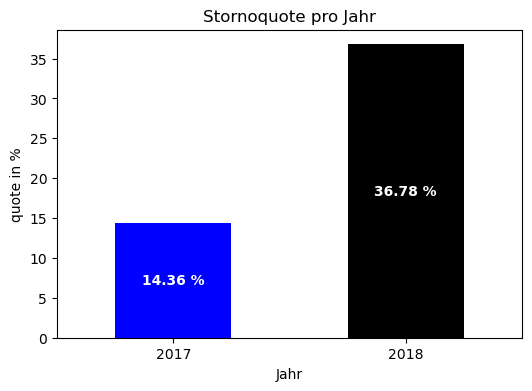

In [6]:
# Stornoquote pro Jahr berechnen
storno_jahr = df.groupby("arrival_year")["booking_status"].mean() * 100
storno_jahr = storno_jahr.round(2)

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(6, 4))
balken = storno_jahr.plot(kind="bar", color=["blue","black"], ax=ax)

ax.set_title("Stornoquote pro Jahr")
ax.set_ylabel("quote in %")
ax.set_xlabel("Jahr")
ax.set_xticklabels(storno_jahr.index, rotation=0)

#Prozentwerte im Balken anzeigen
for i, v in enumerate(storno_jahr):
    ax.text(i, v/2, f"{v:.2f} %", ha='center', va='center', color='white', fontweight='bold')

plt.show()


<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Während die Stornoquote im Jahr 2017 bei rund 14 % lag, stieg sie im Jahr 2018 deutlich auf knapp 37 %. Damit hat sich der Anteil der stornierten Reservierungen innerhalb eines Jahres mehr als verdoppelt.</p>

<h3>Wie verteilen sich die Stornierungen innerhalb eines Jahres?</h3>

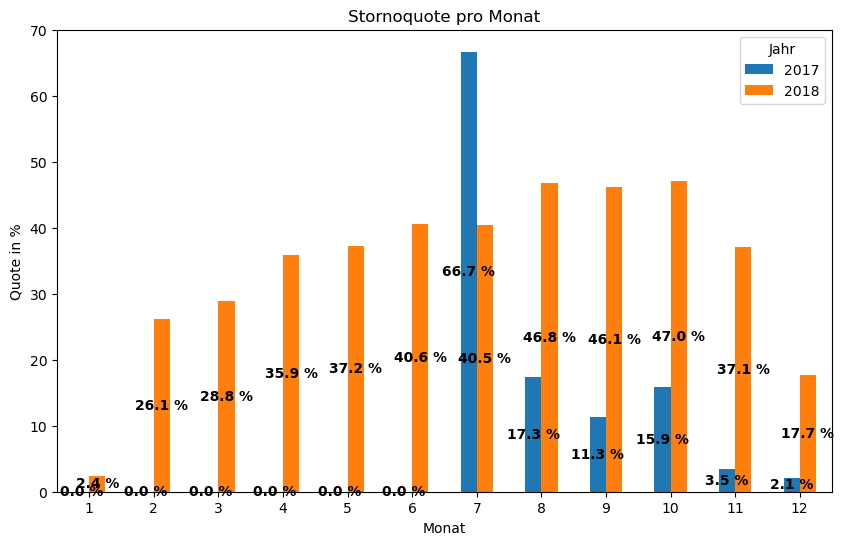

In [7]:
# Stornoquote pro Monat und Jahr berechnen
storno_monat = df.groupby(["arrival_year", "arrival_month"])["booking_status"].mean() * 100
storno_monat = storno_monat.round(2).unstack(level=0) 


# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))
storno_monat.plot(kind="bar", ax=ax)

ax.set_title("Stornoquote pro Monat")
ax.set_ylabel("Quote in %")
ax.set_xlabel("Monat")
ax.legend(title="Jahr")
plt.xticks(rotation=0)

# Prozentwerte in den Balken anzeigen
for box in ax.containers:
    ax.bar_label(box, fmt="%.1f %%", label_type="center", color="black", fontweight="bold")

plt.show()


<h3>Wie hoch ist die Rückkehrquote, also wie viele Gäste besuchen das Hotel wiederholt?</h3>

In [8]:
#Anzahl wiederkehrender Gäste 
anzahl_gaeste_wieder = (df["repeated_guest"] == 1).sum()

#Anteil in Prozent
anteil_gaeste_wieder = anzahl_gaeste_wieder / len(df) * 100

print(f"Anzahl der Besucher die das Hotel wiederholt reserviert haben:\n\n{anzahl_gaeste_wieder} Gäste\n")
print(f"Der Prozentuale Anzeil:\n\n{round(anteil_gaeste_wieder, 2)}% aller Gäste haben wiederholt gebucht")



Anzahl der Besucher die das Hotel wiederholt reserviert haben:

455 Gäste

Der Prozentuale Anzeil:

2.51% aller Gäste haben wiederholt gebucht


<h3>Welche Zielgruppen nutzen das Hotel </h3>

<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Um die Zielgruppen einzuordnen muss definiert werden welche Buchungseigenscahften zu welcher Zielgruppe passen. Hier wird davon ausgegangen, dass zum Beipsiel zwei Erwachsene ohne Kinder ein Paar ist. Weitere zuordnungen sind Einzelpersonen, Familien oder Geschäftsreisende die wie im folgenden zu sehen eingeordet werden.

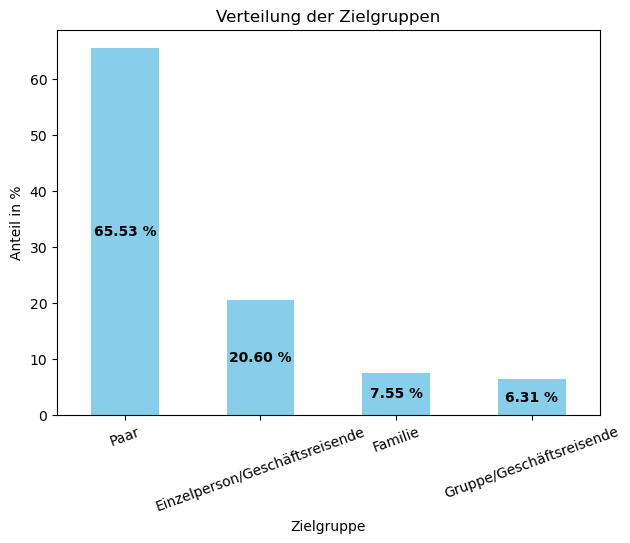

In [9]:
data_temp = df.copy()

data_temp.loc[data_temp["no_of_children"] > 0, "zielgruppe"] = "Familie"
data_temp.loc[(data_temp["no_of_adults"] == 1) & (data_temp["no_of_children"] == 0), "zielgruppe"] = "Einzelperson/Geschäftsreisende"
data_temp.loc[(data_temp["no_of_adults"] == 2) & (data_temp["no_of_children"] == 0), "zielgruppe"] = "Paar"
data_temp.loc[(data_temp["no_of_adults"] > 2) & (data_temp["no_of_children"] == 0), "zielgruppe"] = "Gruppe/Geschäftsreisende"

#Verteilung
zielgruppen_verteilung = data_temp["zielgruppe"].value_counts(normalize=True) * 100
zielgruppen_verteilung = zielgruppen_verteilung.round(2)

fig, ax = plt.subplots(figsize=(7, 5))
balken = zielgruppen_verteilung.plot(kind="bar", color="skyblue", ax=ax)

ax.set_title("Verteilung der Zielgruppen")
ax.set_ylabel("Anteil in %")
ax.set_xlabel("Zielgruppe")
ax.set_xticklabels(zielgruppen_verteilung.index, rotation=20)

# Prozentwerte im Balken anzeigen
for i, v in enumerate(zielgruppen_verteilung):
    ax.text(i, v/2, f"{v:.2f} %", ha='center', va='center', color='black', fontweight='bold')
plt.show()

<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Die Auswertung der Zielgruppen zeigt, dass Paare mit einem Anteil von rund 65 % die größte Besuchergruppe des Hotels darstellen. Deutlich geringer fällt der Anteil der Einzelpersonen beziehungsweise Geschäftsreisenden aus, die etwa 21 % ausmachen. Familien sind mit knapp 8 % vertreten, während Gruppen oder Geschäftsreisende in größerer Anzahl lediglich einen Anteil von gut 6 % ausmachen. Insgesamt wird damit sichtbar, dass das Hotel überwiegend von Paaren genutzt wird, während andere Zielgruppen eine eher untergeordnete Rolle spielen.

<h3>Wie verteilt sich der durchschnittliche Zimmerpreis pro Nacht, und unterscheidet er sich zwischen stornierten und nicht stornierten Buchungen?</h3>

<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Um die Bedeutung des durchschnittlichen Zimmerpreises für das Buchungsverhalten zu untersuchen, wird zunächst die allgemeine Verteilung der Preise mithilfe eines Histogramms dargestellt. Dadurch lässt sich erkennen, in welchem Preisbereich die meisten Buchungen liegen und ob Ausreißer vorhanden sind. Anschließend wird der durchschnittliche Zimmerpreis zwischen stornierten und nicht stornierten Buchungen mittels eines Boxplots verglichen. So können Unterschiede in der Preisstruktur sichtbar gemacht werden, beispielsweise ob Stornierungen bei höheren oder niedrigeren Zimmerpreisen häufiger auftreten. Damit eine besser Aussagekraft sichergestellt werden kann müssen Außreißer entfernt werden die nur wenige Male vorkommen und das Ergebnis verzerren würden.

/tmp/ipykernel_4903/694320015.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="booking_status", y="avg_price_per_room", data=data_clean, palette=["green", "red"], ax=ax[1])


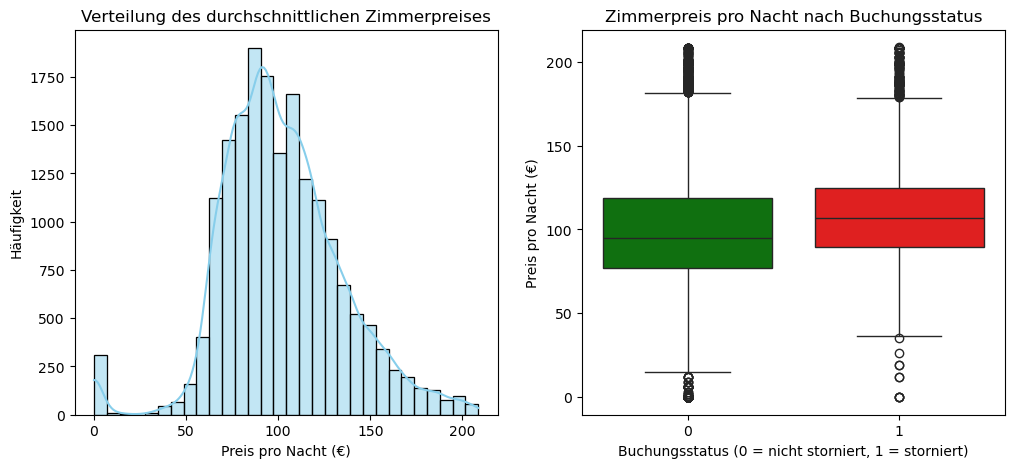

In [10]:
untere_grenze = df["avg_price_per_room"].quantile(0.01)
obere_grenze = df["avg_price_per_room"].quantile(0.99)

data_clean = df[(df["avg_price_per_room"] >= untere_grenze) & 
                  (df["avg_price_per_room"] <= obere_grenze)]


#histogramm preisverteilung
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_clean["avg_price_per_room"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Verteilung des durchschnittlichen Zimmerpreises")
ax[0].set_xlabel("Preis pro Nacht (€)")
ax[0].set_ylabel("Häufigkeit")

#storniert vs. nicht storniert
sns.boxplot(x="booking_status", y="avg_price_per_room", data=data_clean, palette=["green", "red"], ax=ax[1])
ax[1].set_title("Zimmerpreis pro Nacht nach Buchungsstatus")
ax[1].set_xlabel("Buchungsstatus (0 = nicht storniert, 1 = storniert)")
ax[1].set_ylabel("Preis pro Nacht (€)")

plt.show()


<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Die Auswertung der Zimmerpreise zeigt, dass die meisten Buchungen zwischen etwa 70 € und 120 € pro Nacht liegen. Extremwerte nach oben oder unten gibt es zwar, die kommen aber nur selten vor. Vergleicht man stornierte mit nicht stornierten Buchungen, wird sichtbar, dass bei Stornierungen die Preise im Schnitt etwas höher sind. Das deutet darauf hin, dass der Preis durchaus Einfluss auf die Stornoquote haben kann.

<h3>Gibt es einen Zusammenhang zwischen der Buchungsvorlaufzeit (Lead Time) und der Wahrscheinlichkeit einer Stornierung?</h3>

In [11]:
storno_avg_leadtime = df.loc[df["booking_status"] == 1, "lead_time"].mean().round(2)
nicht_storno_avg_leadtime = df.loc[data_temp["booking_status"] == 0, "lead_time"].mean().round(2)

print("Storniert:", storno_avg_leadtime)
print("Nicht storniert:", nicht_storno_avg_leadtime)


Storniert: 139.27
Nicht storniert: 59.12


<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Im Durchschnitt beträgt die Vorlaufzeit bei nicht stornierten Buchungen rund 59 Tage, während stornierte Buchungen im Schnitt bereits 139 Tage im Voraus getätigt wurden. Damit zeigt sich, dass Gäste die ihre Reservierung mit großem zeitlichen Vorlauf tätigen deutlich häufiger stornieren. Kurzfristige Buchungen hingegen werden in der Regel eingehalten und weisen eine wesentlich geringere Stornoquote auf.


<h3>Welche Rolle spielen Sonderwünsche der Gäste, steigt oder sinkt dadurch die Stornoquote?</h3>

In [12]:
# Stornoquote je nach Anzahl der Sonderwünsche
storno_sonderwuensche = data_temp.groupby("no_of_special_requests")["booking_status"].mean() * 100
storno_sonderwuensche = storno_sonderwuensche.round(2)

print("Stornoquote in % nach Anzahl der Sonderwünsche:")

print(storno_sonderwuensche)


Stornoquote in % nach Anzahl der Sonderwünsche:
no_of_special_requests
0    42.87
1    24.16
2    14.65
3     0.00
4     0.00
5     0.00
Name: booking_status, dtype: float64


<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Buchungen ohne Soderwünsche werden am häufigsten storniert, wohingegen zusätzlich Wünsche ohingegen zusätzliche Wünsche die Stornoquote senken. Bereits bei einem Sonderwunsch senkt sich die Wahrscheinlichkeit einer Stornierung um fast 20%, bei zwei Sonderwünschen liegt sie nur noch bei rund 15 %. Allerdings ist zu beachten, dass im Datensatz nur sehr wenige Gäste mehr als zwei Sonderwünsche angegeben haben. Daher sollte das Ergebnis vorsichtig interpretiert werden.

## Vorbereitung für Machine-Learning Modelle

<p style="text-align: justify;line-height: 1.5;color:black; font-family: 'Times New Roman', Times, serif;">Für einen weiteren Eindruck der Daten bietet es sich an, diese mithilfe von Histogrammen zu visualisieren. Bei vielen Machine-Learning-Methoden ist es entscheidend, dass die eingespeisten Daten zuvor sinnvoll aufbereitet werden. Dabei sollte insbesondere darauf geachtet werden, ob die Verteilungen links- oder rechtsschief sind. Durch die Visualisierung lässt sich außerdem erkennen, um welche Art von Daten es sich handelt, also ob es sich um nominale Werte oder kontinuierliche Messwerte handelt. Auf dieser Grundlage kann bereits über mögliche Aufbereitungsschritte entschieden werden, beispielsweise ob und wie Daten zusammengefasst oder transformiert werden sollten.</p>

Zuvor werden die Daten für die weitere Bearbeitung in Trainings- und Testdaten aufgeteilt. 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Dabei wird sichtbar, dass die meisten Buchungen mit zwei Erwachsenen erfolgen und Kinder nur in wenigen Fällen vorkommen. Auch die Anzahl der gebuchten Nächte verteilt sich überwiegend auf kurze Aufenthalte von ein bis drei Nächten. Der Großteil der Gäste benötigt keinen Parkplatz und wählt in den meisten Fällen denselben Zimmertyp. Weiterhin ist erkennbar, dass die Aufenthalte überwiegend im Jahr 2018 stattfinden und sich die Ankünfte über die Monate ungleichmäßig, mit Spitzen in den Sommermonaten, verteilen. Auffällig ist zudem, dass nur sehr wenige Gäste bereits zuvor gebucht oder storniert haben. Auch der durchschnittliche Zimmerpreis konzentriert sich in einem Bereich von rund 100 Einheiten, wobei es vereinzelte Ausreißer nach oben gibt. </p>


In [13]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

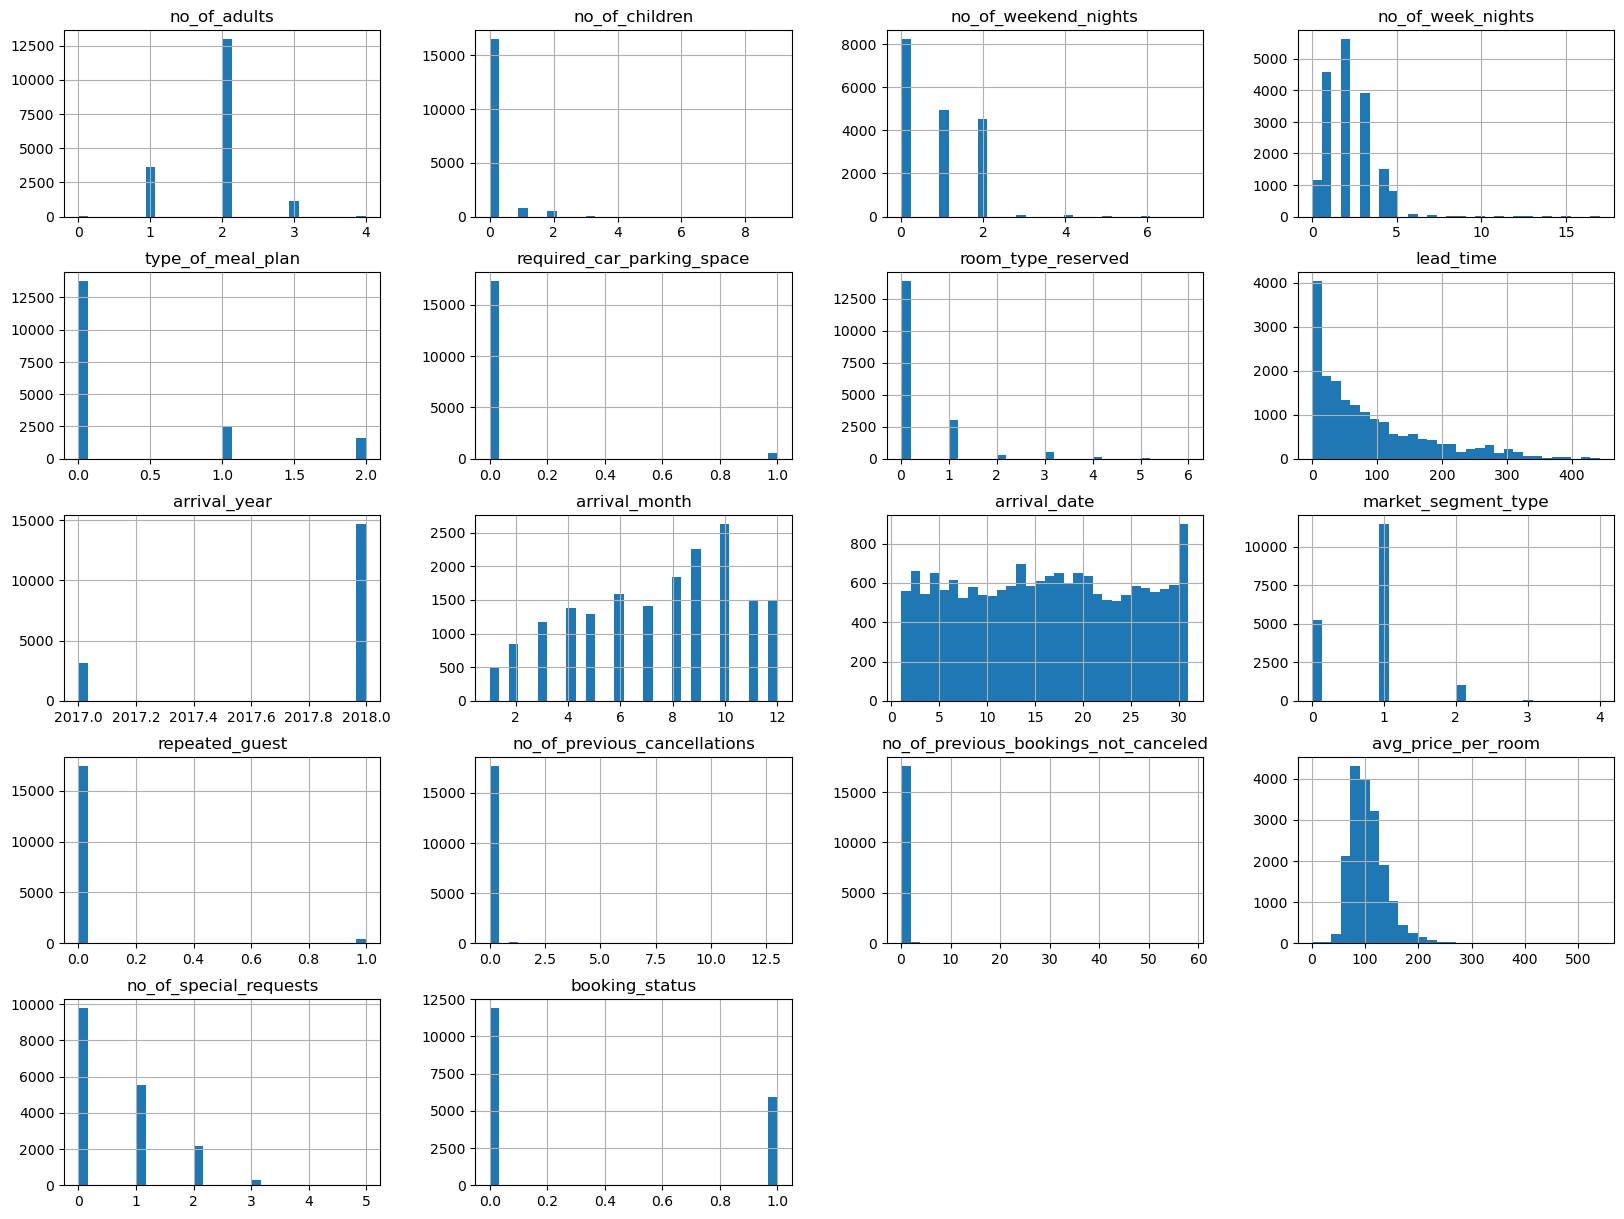

In [42]:
df.hist(bins=30, figsize=(20,15))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

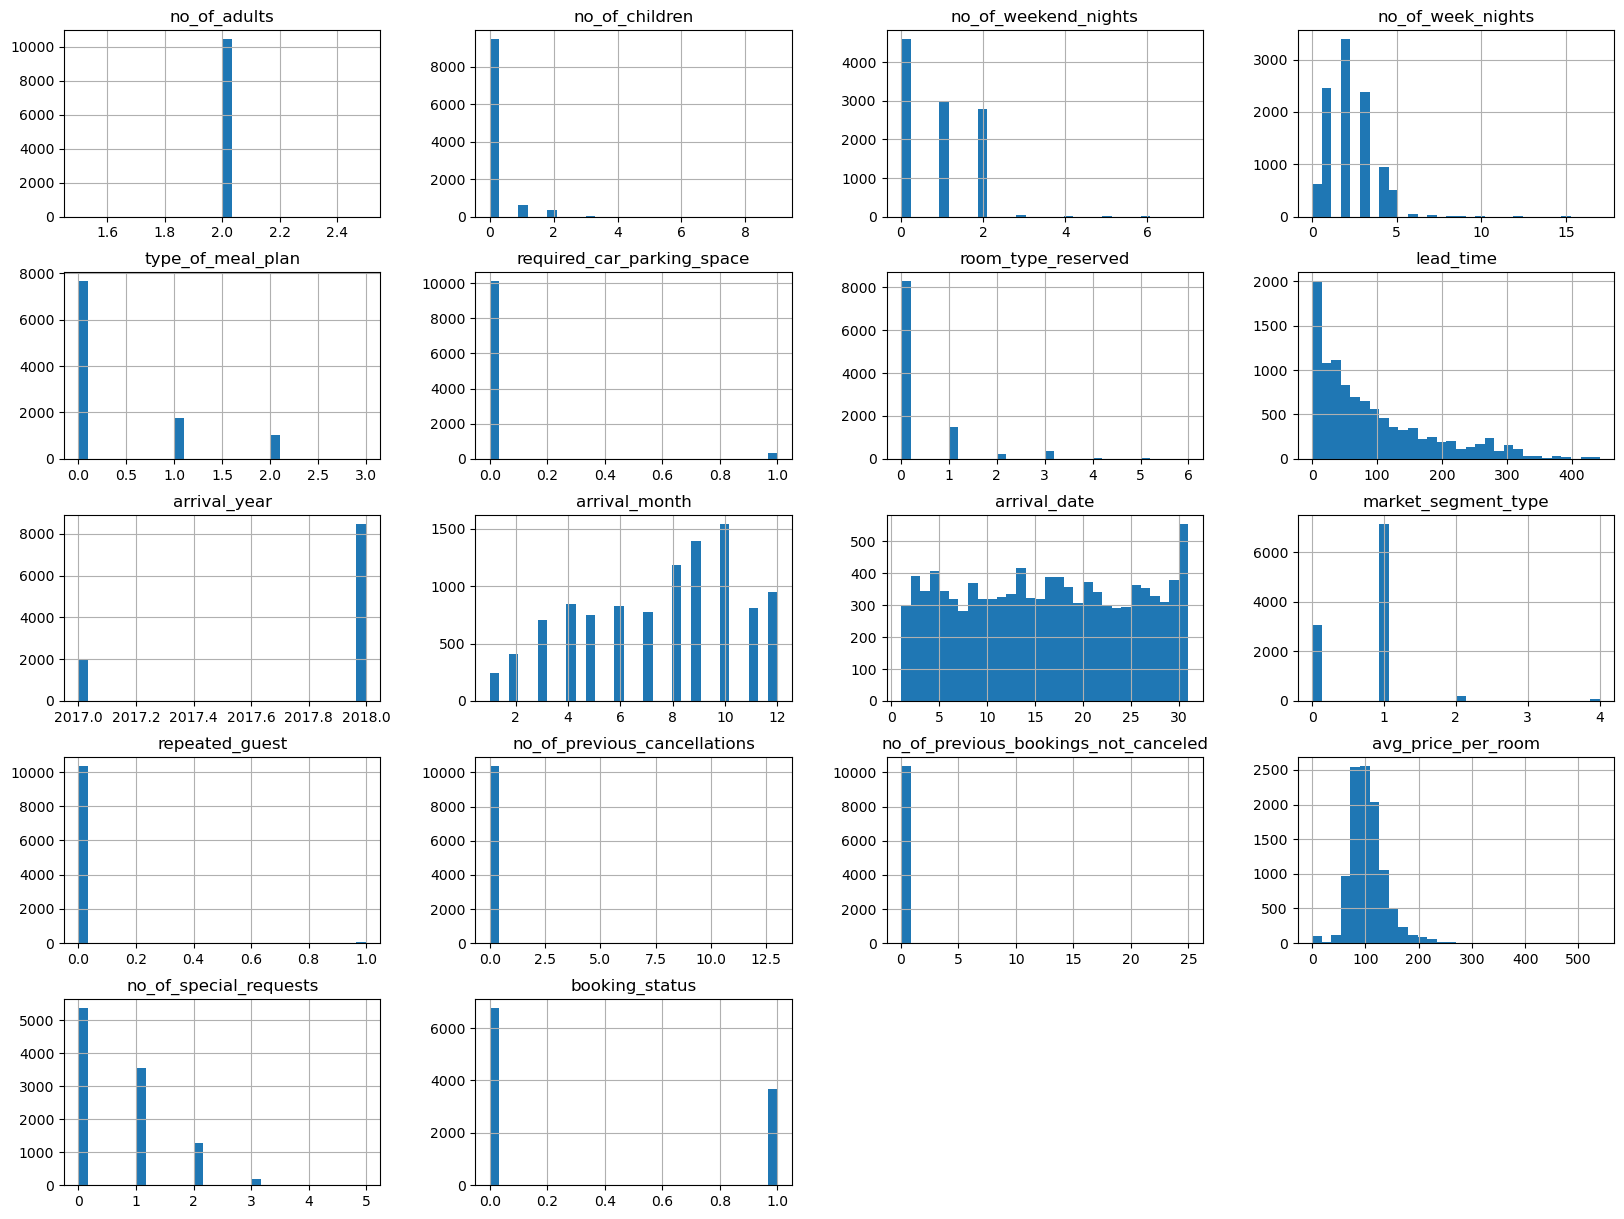

In [16]:
train_df[train_df["no_of_adults"] == 2].hist(bins=30, figsize=(20,15))
plt.show()

Aufgeteilt in Trainingsdaten und Testdaten + Merkmal "market_segment_type" stratefiziert weil davon ausgegangen wird das das ein wichtiges Merkmal sein wird (evt. noch eine Begründung)

In [43]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=df["market_segment_type"]  # hält die Segment-Verteilung konstant
)

Daten kopieren damit wir eine Sicherheitskopie haben wenn wir nun die Daten für machine learning modelle aufbereiten

In [44]:
train_hotel = X_train

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Betrachtet man die Verteilungen der einzelnen Merkmale genauer, so fällt auf, dass viele Merkmale diskret vorliegen, beispielsweise die Anzahl der Erwachsenen, Kinder oder Nächte. Diese Werte nehmen nur bestimmte ganzzahlige Ausprägungen an und lassen sich dadurch klar voneinander abgrenzen. Andere Variablen wie die Vorlaufzeit (<i>lead_time</i>) oder der durchschnittliche Zimmerpreis (<i>avg_price_per_room</i>) zeigen hingegen eine stark rechtsschiefe Verteilung, was bedeutet, dass die meisten Werte in einem niedrigen Bereich liegen, während einige Ausreißer sehr hohe Werte aufweisen. Schiefe Verteilungen können die Modellierung erschweren und erfordern daher eine Transformation oder Normalisierung. Der Datensatz weist sowohl diskrete als auch stetige Merkmale auf, deren Verteilungen teils deutlich von einer Normalverteilung abweichen.. (Quelle)
</p>




<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die Merkmale <i>avg_price_per_room</i> und <i>lead_time</i> können durch eine logarithmische Transformation symmetrischer gemacht werden. Dadurch wird der Einfluss von Ausreißern reduziert und die Daten verteilen sich gleichmäßiger. 

Diskrete Variablen wie die Anzahl der Kinder oder die gebuchten Nächte bleiben in ihrer Form erhalten, können aber zusätzlich in Kategorien eingeteilt werden, etwa in kurze, mittlere und lange Aufenthalte. Zwar gehen durch Informationen verloren aber..


 Bei den Merkmalen <i>room_type_reserved</i> und <i>market_segment_type</i> handelt es sich zwar um Zahlen, diese stehen aber höchstwahrscheinlich für verschiedene Kategorien. Sie dürfen deshalb nicht wie normale Zahlenwerte behandelt werden, da Modelle diese als Reihenfolge interpretieren könnte und die Ergebnise damit verfälscht wären. Stattdessen werden sie als Kategorien betrachtet und mit One-Hot-Encoding in passende numerische Werte umgewandelt. Für die kontinuierlichen Merkmale ist es außerdem sinnvoll, sie zu standardisieren oder zu normalisieren, damit Unterschiede in der Größenordnung wie zum Beispiel zwischen Preisen und Anzahlen ausgeglichen werden. So können die Modelle später zuverlässiger arbeiten.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Bevor die eigentliche Transformation der Daten erfolgt, soll zunächst ein weiterer Blick auf den Datensatz geworfen werden, um die Zusammenhänge zwischen den einzelnen Variablen zu untersuchen. Insbesondere die Analyse von Korrelationen ermöglicht es, erste Hypothesen über mögliche Abhängigkeiten aufzustellen. So kann überprüft werden, welche Merkmale besonders stark miteinander in Beziehung stehen und welche Variablen nur einen geringen oder keinen Zusammenhang aufweisen. Diese Erkenntnisse sind wichtig, um spätere Modellierungen besser zu verstehen und gegebenenfalls irrelevante oder redundante Merkmale frühzeitig zu erkennen.
</p>

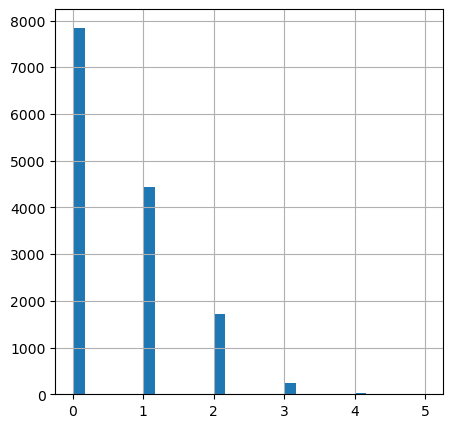

In [45]:
train_hotel["no_of_special_requests"].hist(bins=30, figsize=(5,5))
plt.show()

In [46]:
train_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14282 entries, 13701 to 11311
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14282 non-null  int64  
 1   no_of_children                        14282 non-null  int64  
 2   no_of_weekend_nights                  14282 non-null  int64  
 3   no_of_week_nights                     14282 non-null  int64  
 4   type_of_meal_plan                     14282 non-null  int64  
 5   required_car_parking_space            14282 non-null  int64  
 6   room_type_reserved                    14282 non-null  int64  
 7   lead_time                             14282 non-null  int64  
 8   arrival_year                          14282 non-null  int64  
 9   arrival_month                         14282 non-null  int64  
 10  arrival_date                          14282 non-null  int64  
 11  market_segment_t

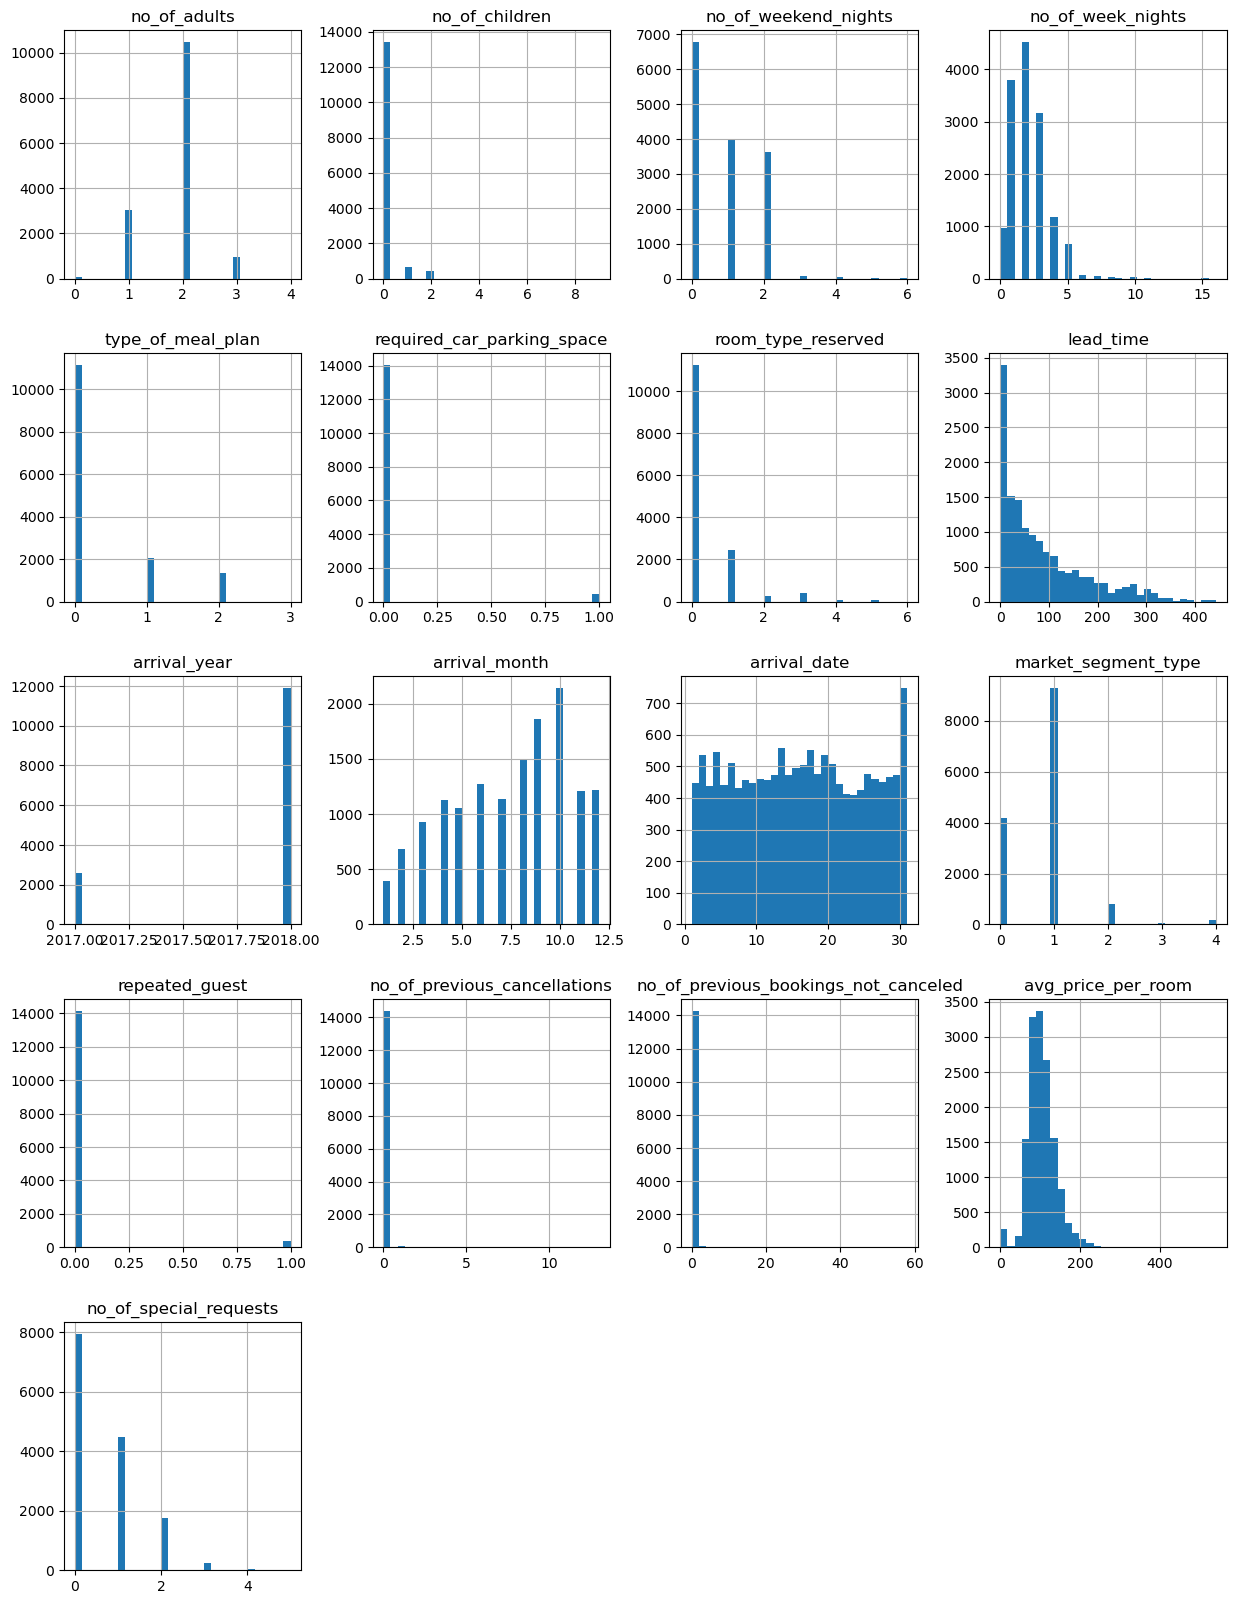

In [21]:
train_hotel.hist(bins=30, figsize=(15,20))
plt.show()

In [22]:
corr_view = df.copy()

In [47]:
corr_matrix = corr_view.select_dtypes(include=["number"]).corr()
corr_matrix["booking_status"]

no_of_adults                            0.094354
no_of_children                          0.035093
no_of_weekend_nights                    0.061117
no_of_week_nights                       0.096472
type_of_meal_plan                       0.076685
required_car_parking_space             -0.092640
room_type_reserved                      0.021723
lead_time                               0.434314
arrival_year                            0.183256
arrival_month                          -0.011472
arrival_date                            0.011389
market_segment_type                    -0.045906
repeated_guest                         -0.106715
no_of_previous_cancellations           -0.031852
no_of_previous_bookings_not_canceled   -0.060697
avg_price_per_room                      0.145245
no_of_special_requests                 -0.248289
booking_status                          1.000000
schonmal_storniert                     -0.054664
Name: booking_status, dtype: float64

In [24]:
corr_view["schonmal_storniert"] = (corr_view["no_of_previous_cancellations"] > 0).astype(int)

In [25]:
corr_view

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,schonmal_storniert
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1,0
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1,0
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1,0
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1,0
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1,0
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0,0


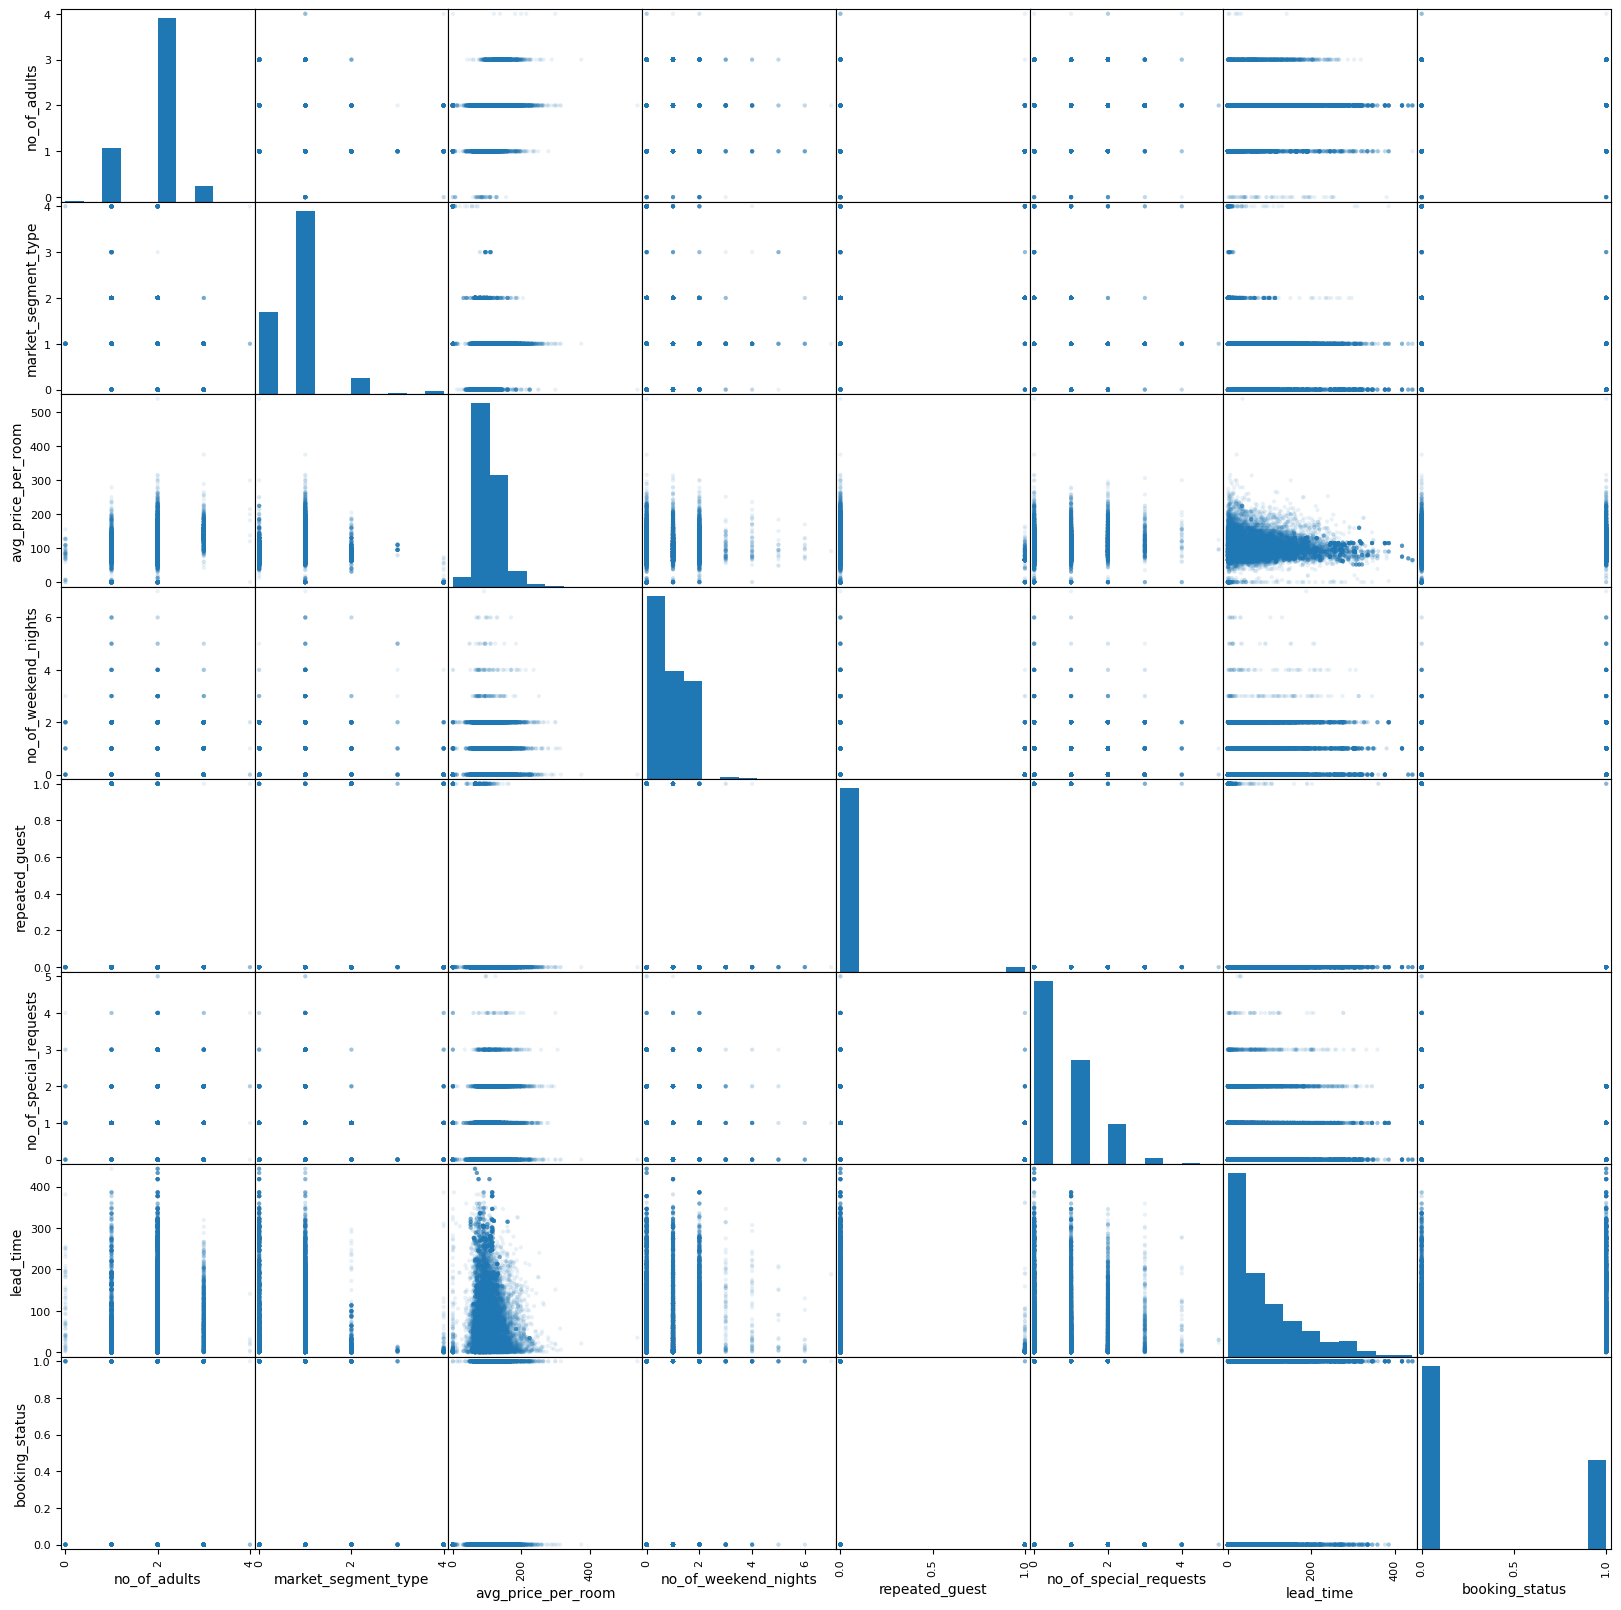

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(corr_view[["no_of_adults","market_segment_type","avg_price_per_room","no_of_weekend_nights","repeated_guest","no_of_special_requests","lead_time","booking_status"]]
               ,alpha=0.1,figsize=(20,20),diagonal='hist')
plt.show()

<Axes: >

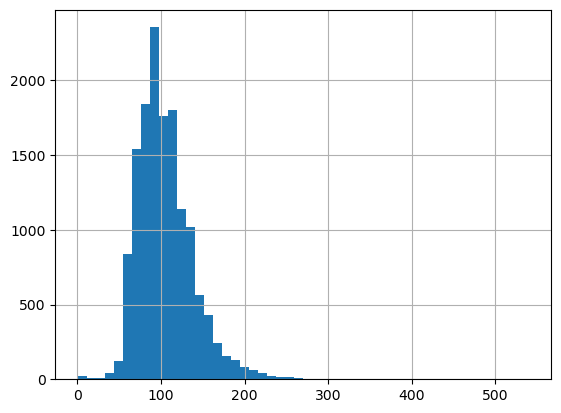

In [48]:
train_hotel["avg_price_per_room"].hist(bins=50)

In [51]:
df = df[df["avg_price_per_room"] != 0]

In [ ]:
# 1) Train/Test-Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

target = "booking_status"
feature_cols = (
    ["n_avg_price_per_room"] +                                  # numerisch
    ["n_lead_time","n_arrival_season","n_market_segment_bin","n_cut_special_request"] +  # kateg.
    ["n_no_of_weekend_nights","n_room_type_reserved","n_no_of_children"]                  # binär
)

X = df[feature_cols].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Modelle in je einer Pipeline (Preprocessing + Modell)
logreg_pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300, max_depth=None, n_jobs=-1, random_state=42, class_weight="balanced"
    ))
])

# 3) Trainieren
logreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

# 4) Bewerten
for name, pipe in [("LogReg", logreg_pipe), ("RandomForest", rf_pipe)]:
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]
    print(f"\n=== {name} ===")
    print("ROC-AUC :", roc_auc_score(y_test, y_proba).round(3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
